# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [1]:
# !python -m pip install kaggle==1.6.12

In [2]:
# !pip install --target=/workspace ucimlrepo

**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
* The problem is to find the correlation between the popularity of a track and the views on Youtube.

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1: Spotify Dataset**

The dataset is a collection of Spotify tracks spanning 125 different genres. Each track in the dataset is characterized by a set of features that provide detailed information about it.


Type: *CSV File.*

Method: *The data was gathered using the "Downloading files" method from Kaggle.*

Dataset variables:

*   id
*   name
*   album
*   album_id
*   artists
*   artist_ids
*   track_number
*   disc_number
*   explicit
*   danceability
*   energy
*   key
*   loudness
*   mode
*   speechiness
*   acousticness
*   instrumentalness
*   liveness
*   valence
*   tempo
*   duration_ms
*   time_signature
*   release_date
*   popularity

In [3]:
#FILL IN 1st data gathering and loading method
import pandas as pd
Spotify_df = pd.read_csv("dataset.csv")


#### Dataset 2 : Trending YouTube Video Statistics

The "*Trending YouTube Video Statistics*" dataset provides an overview of the performance of trending videos on YouTube. This dataset, compiled from various sources, captures key metrics and attributes of trended videos on the platform, what we are going to use from this dataset is the 10th category which is for musical videos only.


Type: *CSV File.* 

Method: *Programmatically downloading files method from Kaggle source*

Dataset variables:

*   video_id
*   trending_date
*   title
*   channel_title
*   category_id
*   publish_time
*   tags
*   views
*   likes
*   dislikes
*   comment_count
*   thumbnail_link
*   comments_disabled
*   ratings_disabled
*   video_error_or_removed
*   description



In [6]:
import os
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi

dataset = 'datasnaek/youtube-new'

file_to_download = 'US_category_id.json'
file_to_download2 = 'USvideos.csv'

folder_title = 'youtube'
if not os.path.exists(folder_title):
    os.makedirs(folder_title)

api = KaggleApi()
api.authenticate()

api.dataset_download_file(dataset, file_to_download, path=folder_title)
api.dataset_download_file(dataset, file_to_download2, path=folder_title)

for item in os.listdir(folder_title):
    if item.endswith('.zip'):
        zip_file_path = os.path.join(folder_title, item) 
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(folder_title)
        os.remove(zip_file_path)

youtube_df = pd.read_csv('./youtube/USvideos.csv')

Dataset URL: https://www.kaggle.com/datasets/datasnaek/youtube-new
Dataset URL: https://www.kaggle.com/datasets/datasnaek/youtube-new


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [7]:
#Optional: store the raw data in your local data store

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [8]:
#FILL IN - Inspecting the dataframe visually
Spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [9]:
#FILL IN - Inspecting the dataframe programmatically
Spotify_df.info()
Spotify_df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

0

Issue and justification: Looking at the summary of the Spotify_df returned by `.info()` we can see that 
* There is one null value on each artists ,album_name and track_name


### Quality Issue 2:

In [10]:
youtube_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [11]:
youtube_df.info()
youtube_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

48

Issue and justification: *Looking at the summary of the youtube_df*

* There are 48 duplicated rows
* The publish_time need to change format to be easy to read

### Tidiness Issue 1:

In [12]:
Spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [13]:
Spotify_df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Issue and justification: *the problem we have in columns loudness and tempo , they are not normalized so we dont have a valid metric*

### Tidiness Issue 2: 

In [14]:
youtube_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [15]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

Issue and justification: *accourding to category_id and US_category_id.json we should drop all category_id != 10*

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [17]:
spotify_copy = Spotify_df
youtube_copy = youtube_df

### **Quality Issue 1: FILL IN**

In [18]:
Spotify_df = Spotify_df.dropna(subset=['track_name'])
Spotify_df = Spotify_df.dropna(subset=['album_name'])
Spotify_df = Spotify_df.dropna(subset=['artists'])
Spotify_df=Spotify_df.drop_duplicates()

In [19]:
Spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

Justification: *we cant fill the null values so we drop them*

### **Quality Issue 2: FILL IN**

In [20]:
youtube_df=youtube_df.drop_duplicates()

In [21]:
youtube_df.duplicated().sum()

0

Justification: *duplicates are not valuable*

### **Tidiness Issue 1: FILL IN**

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_normalize = ['loudness', 'tempo']
Spotify_df[columns_to_normalize] = scaler.fit_transform(Spotify_df[columns_to_normalize])

In [23]:
Spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.791392,0,0.1430,0.0322,0.000001,0.3580,0.715,0.361245,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.597377,1,0.0763,0.9240,0.000006,0.1010,0.267,0.318397,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.736123,1,0.0557,0.2100,0.000000,0.1170,0.120,0.313643,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.573701,1,0.0363,0.9050,0.000071,0.1320,0.143,0.746758,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.737103,1,0.0526,0.4690,0.000000,0.0829,0.167,0.492863,4,acoustic


Justification: *they are not normalized so we dont have a valid metric*

### **Tidiness Issue 2: FILL IN**

In [24]:
youtube_df= youtube_df[youtube_df['category_id'] == 10]

In [25]:
youtube_df.describe()

,category_id,views,likes,dislikes,comment_count
count,6467.0,6.467000e+03,6.467000e+03,6467.000000,6.467000e+03
mean,10.0,6.204776e+06,2.190463e+05,7912.998918,1.937155e+04
std,0.0,1.546525e+07,4.849044e+05,23625.485432,6.835039e+04
min,10.0,1.591000e+03,0.000000e+00,0.000000,0.000000e+00
25%,10.0,3.825600e+05,1.430100e+04,346.000000,9.920000e+02
50%,10.0,1.434324e+06,6.229900e+04,1244.000000,3.903000e+03
75%,10.0,4.951624e+06,1.954985e+05,4925.000000,1.401500e+04
max,10.0,2.252119e+08,5.613827e+06,343541.000000,1.228655e+06


Justification: *we will need only musical videos*

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [26]:
Spotify_df =Spotify_df[['track_name', 'popularity','artists']]
youtube_df =youtube_df[['title', 'views','channel_title']]

final_df = pd.merge(Spotify_df, youtube_df, left_on='artists', right_on='channel_title', how='inner')

final_df =final_df.drop_duplicates()
final_df =final_df.drop_duplicates('title')

In [27]:
final_df

,track_name,popularity,artists,title,views,channel_title
0,I'm Yours,80,Jason Mraz,Jason Mraz - Have It All [Official Video],475557,Jason Mraz
615,Animals,3,Nickelback,Nickelback - The Betrayal Act III [Official Vi...,57169,Nickelback
622,Somebody Else,73,The 1975,The 1975 - Give Yourself A Try,1053884,The 1975
657,Honeybrains,3,Royal Blood,Royal Blood - Look Like You Know (Official Video),56553,Royal Blood
840,In the End,85,Linkin Park,Linkin Park & Friends Celebrate Life in Honor ...,615364,Linkin Park
...,...,...,...,...,...,...
26391,Just One Step,27,Shoshana Bean,This Is Me - Cover by Shoshana Bean Featuring ...,114133,Shoshana Bean
26479,Slow Dancing in a Burning Room,74,John Mayer,John Mayer - New Light (Premium Content!),798095,John Mayer
27781,Girl on Fire,77,Alicia Keys,Alicia Keys - When You Were Gone,95944,Alicia Keys
27911,My Silver Lining,66,First Aid Kit,First Aid Kit - Fireworks (Official Lyric Video),13128,First Aid Kit


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [28]:
final_df.to_csv('final.csv', index=False, encoding="utf-8")


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

* Research question: How does the popularity of a track correlate with its YouTube video views ?


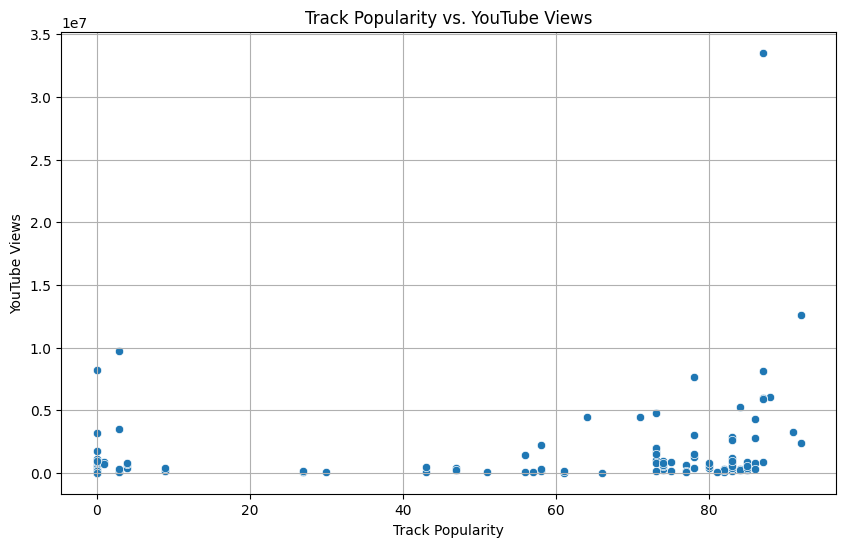

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('final.csv')

# Scatter plot: Track Popularity vs. YouTube Views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='views', data=data)
plt.title('Track Popularity vs. YouTube Views')
plt.xlabel('Track Popularity')
plt.ylabel('YouTube Views')
plt.grid(True)
plt.show()


* Answer to research question: there is a weak positive correlation, meaning that as the popularity of a track increases, the number of YouTube views tends to increase slightly.

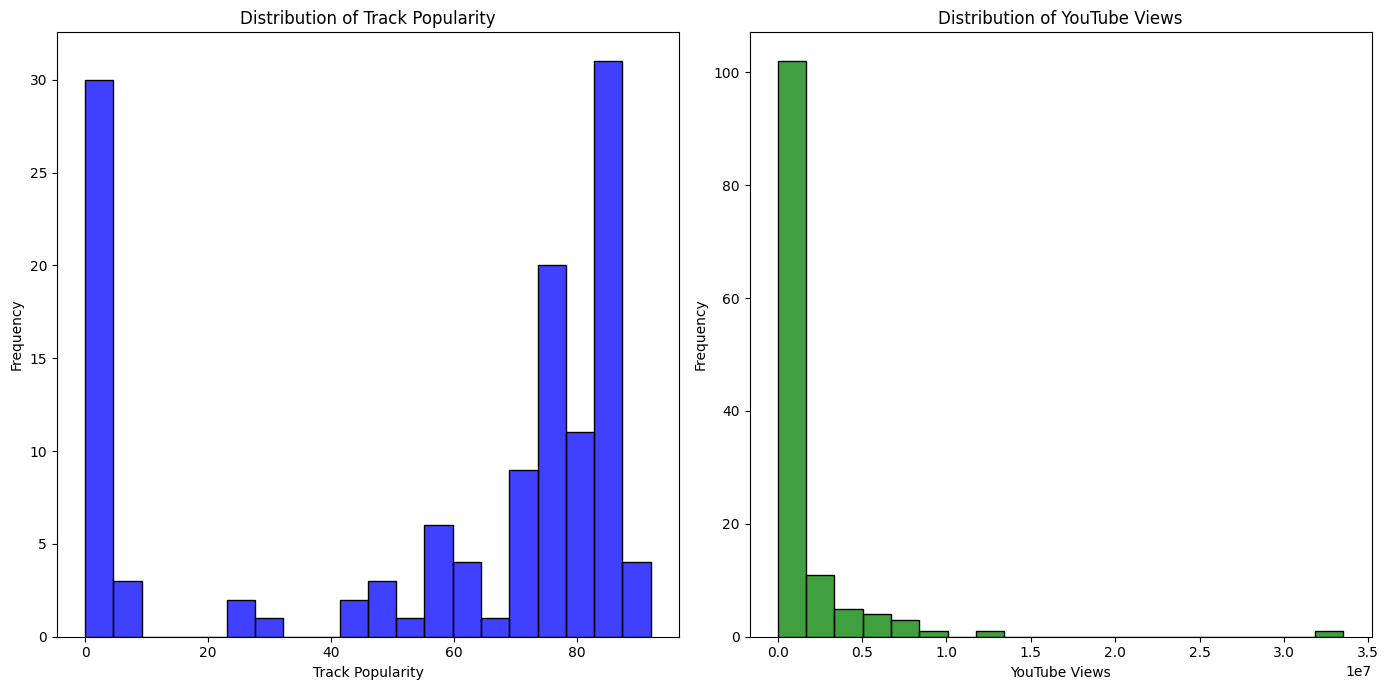

In [31]:
# Histogram: Distribution of Track Popularity
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(data['popularity'], bins=20, color='blue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')

# Histogram: Distribution of YouTube Views
plt.subplot(1, 2, 2)
sns.histplot(data['views'], bins=20, color='green')
plt.title('Distribution of YouTube Views')
plt.xlabel('YouTube Views')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


*Answer to research question:* from this plot :

popularity can be a factor in determining YouTube views, but the relationship between the two is relatively weak.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time to complete the project, I would dive deep into the factors influencing YouTube views beyond track popularity. This could include checking on the impact of promotion strategies, the timing of release,the band or the artist , and social media.


